## Style transfer
На этой неделе вашей задачей будет реализация A Neural Algorithm of Artistic Style

In [1]:
import torch

import numpy as np

from torchvision import models
from skimage import io, img_as_float, transform

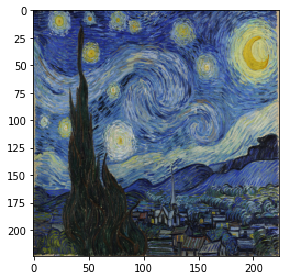

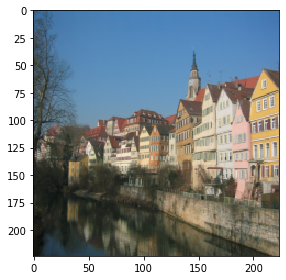

In [2]:
# Загрузим картинки и приведем их к размеру 224x224

img_style = img_as_float(io.imread('./media/vangogh_starry_night.jpg'))
img_style = transform.resize(img_style, [224, 224])
img_content = img_as_float(io.imread('./media/Tuebingen_Neckarfront.jpg'))
img_content = transform.resize(img_content, [224, 224])

io.imshow(img_style)
io.show()
io.imshow(img_content)
io.show()

In [3]:
# VGG лучший выбор. Опционально можете попробовать с другими моделями
model = models.vgg16_bn(pretrained=True)

In [4]:
# Слои для подсчета потерь по умолчанию.
content_activation_names = ['features.32']
style_activation_names = ['features.36', 'features.26', 'features.2', 'features.9', 'features.16']

Дальше — ваша реализация. Несколько советов:
1. Хорошая идея в качестве оптимизатора использовать torch.optim.LBFGS
2. При подсчете матрицы грамма можно выполнить нормировку, поделив каждую ячейку на количество элементов в карте признаков
3. Стартовать оптимизацию можно с изображения контента — быстрее сойдется
4. Веса для стиля и контента могут отличатся на порядки. Подбирайте их исходя из значений лосса до домножения на эти веса.